## Vector Autoregressive models
Importantly we assume: $$ [y_t, x_t, z_t]^T \sim I(0)$$

## Bivariate VAR(1) Model

The bivariate VAR(1) system for variables $y_t$ and $z_t$ is given by:


$$\begin{aligned}
    y_t &= b_{10} - b_{12}z_t + \gamma_{11}y_{t-1} + \gamma_{12}z_{t-1} + \varepsilon_{y,t}, \\
    z_t &= b_{20} - b_{21}y_t + \gamma_{21}y_{t-1} + \gamma_{22}z_{t-1} + \varepsilon_{z,t},
\end{aligned}$$


where:

- $b_{10}$ and $b_{20}$ are the intercepts for $y_t$ and $z_t$, respectively.
- $b_{12}$ and $b_{21}$ capture the contemporaneous relationships between $y_t$ and $z_t$.
- $\gamma_{11}$, $\gamma_{12}$, $\gamma_{21}$, and $\gamma_{22}$ are the coefficients for the lagged terms $y_{t-1}$ and $z_{t-1}$.
- $\varepsilon_{y,t}$ and $\varepsilon_{z,t}$ are the error terms, assumed to be white noise i.e $$\varepsilon \sim WN(0,\sigma^2)$$

We also have structural errors:$$ E(\varepsilon y _ t, \varepsilon y _{t-i}) = 0 $$ $$ E(\varepsilon y _ t, \varepsilon z _{t}) = 0$$


This bivariate (two variable) system is known as a **Structural / Primative** VAR.

This structural VAR has a problem:
- We have a problem esitmating the model because the error of y affects y but, y is in z. This means Z is correlated with epsilon y_t. An explanatory variable being correlated with the error term is a violation of the Gauss Markovian requirement of Exogeneity. Meaning we have a problem estimating the model using OLS.

To solve this we must manipulate the VAR to remove the contemperaneous relationship, i.e variables that occur during the same time period.

Since lagged variables are predetermined in previous periods we only focus on contemperaneous variables. 

We transform the Structural (Primative) VAR into a Reduced form (standard) VAR:

$$ y_t + b_{12}z_t = b_{10} + \gamma_{11}y_{t-1} + \gamma_{12}z_{t-1} + \epsilon_{y,t}$$
$$ b_{21}y_t + z_t = b_{20} + \gamma_{21}y_{t-1} + \gamma_{22}z_{t-1} + \epsilon_{z,t}$$

In matrix form:

$$
\begin{bmatrix}
1 & b_{12} \\
b_{21} & 1
\end{bmatrix}
\begin{bmatrix}
y_t \\
z_t
\end{bmatrix}
=
\begin{bmatrix}
b_{10} \\
b_{20}
\end{bmatrix}
+
\begin{bmatrix}
\gamma_{11} & \gamma_{12} \\
\gamma_{21} & \gamma_{22}
\end{bmatrix}
\begin{bmatrix}
y_{t-1} \\
z_{t-1}
\end{bmatrix}
+
\begin{bmatrix}
\epsilon_{y,t} \\
\epsilon_{z,t}
\end{bmatrix}
$$

alternatively: $$B x_t = \Gamma _0 + \Gamma _1 x_{t-1} + \varepsilon _t$$

We want to isolate x_t so we premultiply by the inverse of the first Matrix which we will denote B, since A matrix multiplied by its inverse results in a Identity matrix.

We get: $$B^{-1}Bx_t = B^{-1}\Gamma _0 + B^{-1} \Gamma _1 x_{t-1} + B^{-1}\varepsilon _t$$

Which we can say as:$$x_t = A_0 + A_1 x_{t-1} + e _t$$

Using the new matrix notation:
$$ y_t  = a_{10} + a_{11}y_{t-1} + a_{12}z_{t-1} + e_{1t}$$
$$ z_t = a_{20} + a_{21}y_{t-1} + a_{22}z_{t-1} + e_{2t}$$

This is the **reduced form** VAR which allows us to run OLS with no **Contemperaneous** Relationship.

We find that the properties of the error terms are Gaussian, i.e zero mean, constant variance(independent of time) and zero covariance.

There is correlation between error terms e1t and e2t however this does not violate Gauss Markov theorem. If we wanted to get rid of this we employ a restriction.

## Stability of a VAR

For stability of a VAR, i.e stationarity we require the roots of the characteristic polynomial to be of magnitude less than one: recalling that $$|(A- \lambda I)| = 0$$
For a non-stationary series we have that the Autoregressive Coefficient is equal to one. Therefore like in the ADF test we require that the value of Lambda that satisfies the determinant equalling zero, the **Eigenvalue** should be less than magnitude 1 indicating the AR Coefficient is less than 1. If we have eigen values less than one this indicates stationarity and stability of the VAR.


## Identification of VAR

Recall a parameter is a constant, a variable is something that changes. 

In our Structural VAR we have 10 parameters in total, 8 in the SVAR and 2 Variances (of error terms). OLS did not work for this form, so we restructured it to put it into a reduced form VAR, standard VAR.

The problem is the Reduced form VAR has 6 parameters, coefficients, and 3 variance parameters, 2 variances and a covariance between error terms, in total **9** parameters.

The Reduced Var has less parameters than the structural VAR , it is under identified.

We must have the same number of parameters in our reduced form as we do our structual, purely for interpretation as we cannot uncover 10 parameters from 9 parameters, therefore we do this by employing a restriction to make the RFVAR identified and interpretable.

We make the assumption that Y is  affected by Z in the same period, however z is not affected by y in the same period and we emply a restriction on one contemperaneous parameter, in order to match parameters in the RFVAR. i.e employ restriction $$b_{21} = 0$$

this makes the matrix form of the rearranged primative VAR into:

$$
\begin{bmatrix}
1 & b_{12} \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
y_t \\
z_t
\end{bmatrix}
=
\begin{bmatrix}
b_{10} \\
b_{20}
\end{bmatrix}
+
\begin{bmatrix}
\gamma_{11} & \gamma_{12} \\
\gamma_{21} & \gamma_{22}
\end{bmatrix}
\begin{bmatrix}
y_{t-1} \\
z_{t-1}
\end{bmatrix}
+
\begin{bmatrix}
\epsilon_{y,t} \\
\epsilon_{z,t}
\end{bmatrix}
$$

The Structural VAR now has 9 parameters after the restriction.
Pre multiplying by $B^-1$ gives:

$$
\begin{bmatrix}
y_t \\
z_t
\end{bmatrix}
=
\begin{bmatrix}
b_{10} - b_{12} b_{20} \\
b_{20}
\end{bmatrix}
+
\begin{bmatrix}
\gamma_{11} - b_{12} \gamma_{21} & \gamma_{12} - b_{12} \gamma_{22} \\
\gamma_{21} & \gamma_{22}
\end{bmatrix}
\begin{bmatrix}
y_{t-1} \\
z_{t-1}
\end{bmatrix}
+
\begin{bmatrix}
\epsilon_{y,t} - b_{12} \epsilon_{z,t} \\
\epsilon_{z,t}
\end{bmatrix}
$$

From this we can say again: 
$$ y_t  = a_{10} + a_{11}y_{t-1} + a_{12}z_{t-1} + e_{1t}$$
$$ z_t = a_{20} + a_{21}y_{t-1} + a_{22}z_{t-1} + e_{2t}$$

Which has 9 parameters.

The model is identified as the Parameters in the primative = the standard.

However, note, one problem with the RFVAR is that the parameters don't have the same economic meaning liek the SVAR parameters. For interpretation we have to look at the specification of what each coefficient means i.e $$a_{11} = \gamma_{11} - b_{12}\gamma _{21}$$

## Lag length

When we go from VAR(1) to VAR(2) and increase the maximum lag length we add an extra set of coefficients. When we add lag lengths we lose degrees of freedom.

We want a parsimonious model. If too little lag the model is mispecified and we might have residual autocorrelation. Too many lags we lose degrees of freedom.

We determine the lag length once again by using information criterion.

## Granger Causality

If $y_t$ Granger causes $z_t$ this means a change in y today affects z tommorow. 

That is: does $y_{t-1} \rightarrow z_t$

we test this by $$H_0 : coefficient \  y_{t-1} = 0$$

or in the above case: $$H_0: a_{21} = 0$$

We test this using the t-test of coefficient significance, this is a helpful short term forecast, to see if yt can be used to predict futre zt.

In general we test the null that any coefficient of a lagged y_t is none zero, using a joint F test where the null is that all coefficients equal zero. Rejection of this null implies that $y_t$ granger causes $z_t$.

Let's run a VAR in python:

In [40]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(7)
time_periods = 1000
n = time_periods


# Define parameters for the system of equations
b10, b12 = 1, 0.5  # Coefficients for y_t equation
b20, b21 = 1, 0.7  # Coefficients for z_t equation
gamma11, gamma12 = 0.8, 0.3  # Coefficients for lagged terms in y_t equation
gamma21, gamma22 = 0.6, 0.5  # Coefficients for lagged terms in z_t equation

epsilon_y = np.random.normal(0,0.8,time_periods)
epsilon_z= np.random.normal(0,0.6,time_periods)

y = np.zeros(n)
z = np.zeros(n)

for t in range(1, n):
    y[t] = b10 - b12 * z[t-1] + gamma11 * y[t-1] + gamma12 * z[t-1] + epsilon_y[t]
    z[t] = b20 - b21 * y[t-1] + gamma21 * y[t-1] + gamma22 * z[t-1] + epsilon_z[t]  


dates = pd.date_range(start='2020-01-01', periods=time_periods, freq='D')
data = pd.DataFrame({'y': y, 'z': z}, index=dates)

data.head()

,y,z
2020-01-01,0.000000,0.000000
2020-01-02,0.627250,0.454529
2020-01-03,1.437150,1.845730
2020-01-04,2.106587,1.831261
2020-01-05,1.687879,2.155972


Taken from Statsmodels documentation:

Note: The VAR class assumes that the passed time series are stationary. Non-stationary or trending data can often be transformed to be stationary by first-differencing or some other method. For direct analysis of non-stationary time series, a standard stable VAR(p) model is not appropriate.

In [41]:
from statsmodels.tsa.stattools import adfuller

adf_results = {
    'y' : adfuller(y, autolag = 'BIC'),
    'z' : adfuller(z, autolag = 'BIC')
}

for series, result in adf_results.items():
    print(f" Results for {series}:")
    print(f"    ADF Statistic : {result[0]}")
    print(f"    p-value : {result[1]}")
    print(f"    Number of lags used: {result[2]}")
    print(f"    Critical Values:")
    for key , value in result[4].items():
        print(f"    {key}: {value}")
    print("=" * 55)

 Results for y:
    ADF Statistic : -9.605855978745748
    p-value : 1.8670999083747028e-16
    Number of lags used: 0
    Critical Values:
    1%: -3.4369127451400474
    5%: -2.864437475834273
    10%: -2.568312754566378
 Results for z:
    ADF Statistic : -16.32878989335256
    p-value : 3.075618999098078e-29
    Number of lags used: 0
    Critical Values:
    1%: -3.4369127451400474
    5%: -2.864437475834273
    10%: -2.568312754566378


We reject the Null of Non-stationarity for both series.

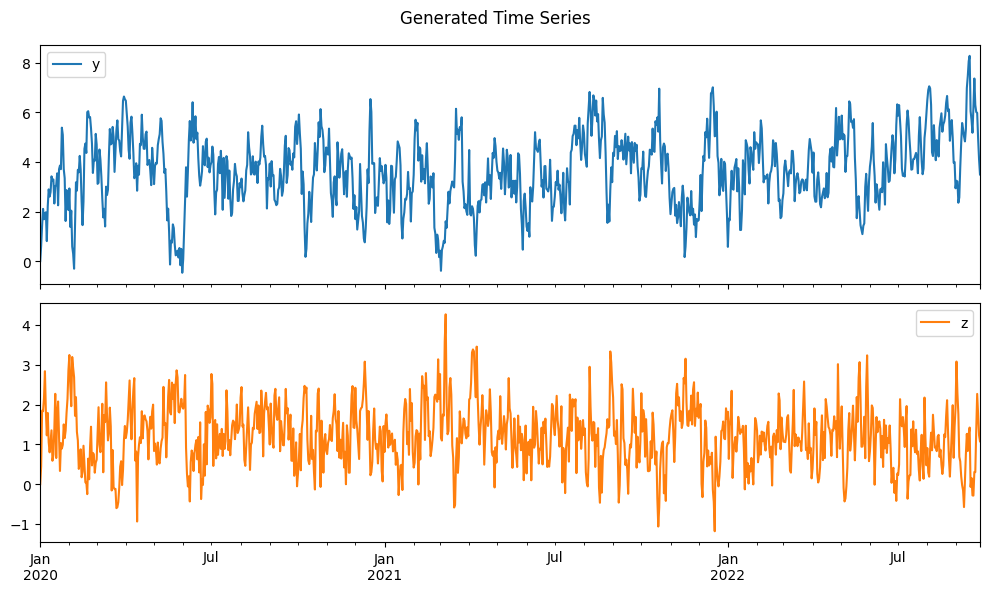

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0      0.03133     0.04126       1.032     0.03511
1      -1.497*     -1.468*     0.2237*     -1.486*
2       -1.492      -1.443      0.2249      -1.473
3       -1.489      -1.420      0.2256      -1.463
4       -1.484      -1.394      0.2268      -1.450
5       -1.479      -1.369      0.2280      -1.437
6       -1.474      -1.345      0.2290      -1.425
7       -1.467      -1.318      0.2305      -1.411
8       -1.460      -1.291      0.2322      -1.396
9       -1.455      -1.266      0.2334      -1.383
10      -1.450      -1.242      0.2345      -1.371
11      -1.445      -1.217      0.2357      -1.358
12      -1.441      -1.193      0.2366      -1.347
13      -1.447      -1.179      0.2352      -1.345
14      -1.444      -1.156      0.2361      -1.334
15      -1.437      -1.129      0.2377      -1.320
-------------------------------

In [42]:
data.plot(subplots=True, layout=(2, 1), figsize=(10, 6), title="Generated Time Series")
plt.tight_layout()
plt.show()

import statsmodels.api as sm
from statsmodels.tsa.api import VAR

model = VAR(data)
lag_order_results = model.select_order(15)
print(lag_order_results.summary())

results = model.fit(maxlags=1)
print(results.summary())



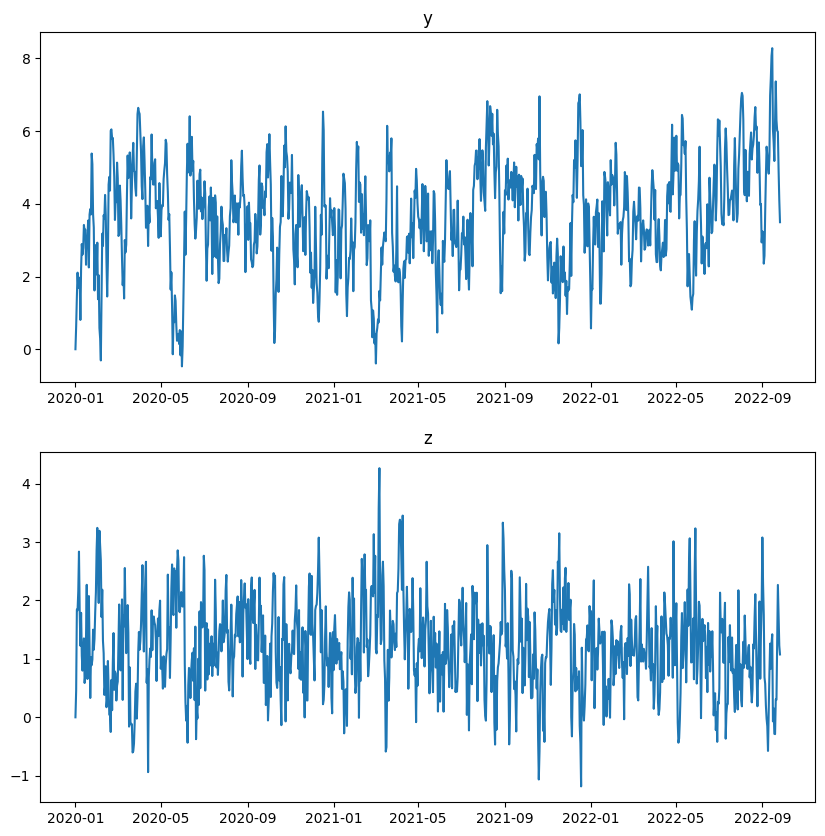

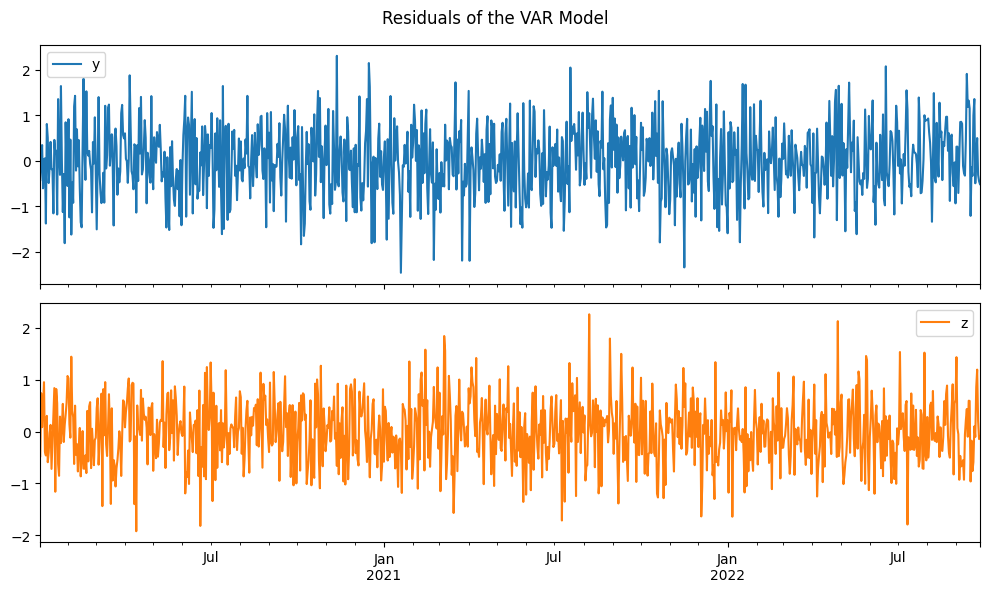

In [43]:
results.plot()
residuals = results.resid
residuals.plot(subplots=True, layout=(2, 1), figsize=(10, 6), title="Residuals of the VAR Model")
plt.tight_layout()
plt.show()

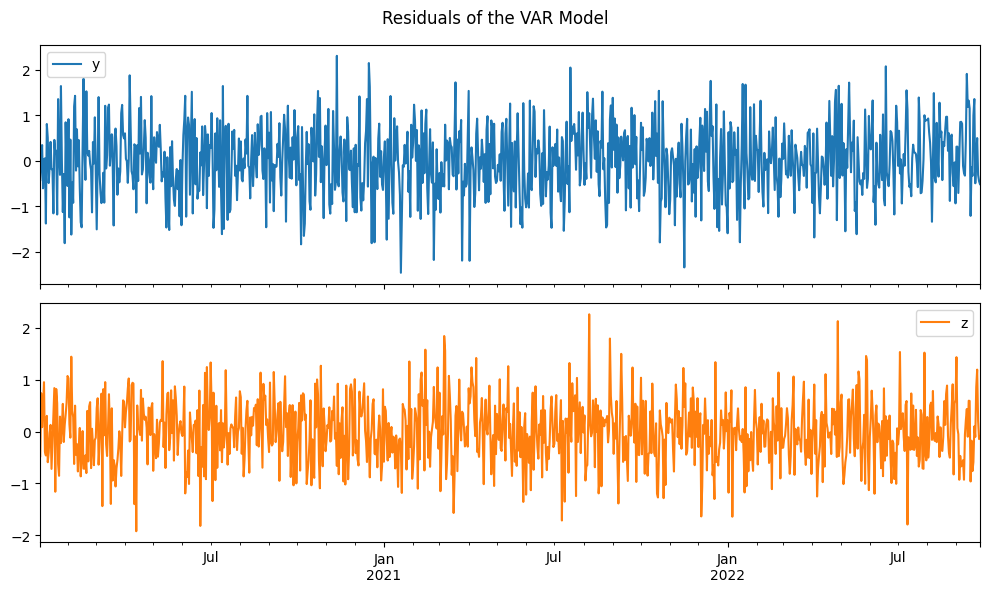

In [44]:
residuals = results.resid
residuals.plot(subplots=True, layout=(2, 1), figsize=(10, 6), title="Residuals of the VAR Model")
plt.tight_layout()
plt.show()

## Impulse Response Functions

Through repeated substitution of the Reduced Form VAR, we find that a finite order VAR process approximates to a VMA(infinity) Vector Moving Average process of order infinity. 

$$X_t = \bar{X} + \sum_{i=0}^\infty A^i_1 e_{t-i}$$

that is:
$$
\begin{bmatrix}
y_t \\
z_t
\end{bmatrix}
=
\begin{bmatrix}
\bar{y} \\
\bar{z}
\end{bmatrix}
+
\sum_{i=0}^\infty
\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{bmatrix} ^ i
\cdot
\begin{bmatrix}
e_{1, t-i} \\
e_{2, t-i}
\end{bmatrix}
$$



recalling $e_t = B^{-1} \varepsilon _t$:
$$
\begin{bmatrix}
y_t \\
z_t
\end{bmatrix}
=
\begin{bmatrix}
\bar{y} \\
\bar{z}
\end{bmatrix}
+
\sum_{i=0}^\infty
\frac{1}{1 - b_{12}b_{21}}
\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{bmatrix}^i
\begin{bmatrix}
1 & -b_{12} \\
-b_{21} & 1
\end{bmatrix}
\begin{bmatrix}
\varepsilon_{1, t-i} \\
\varepsilon_{2, t-i}
\end{bmatrix}
$$

which more compactly is:

$$
\mathbf{X}_t =
\begin{bmatrix}
y_t \\
z_t
\end{bmatrix}
=
\begin{bmatrix}
\bar{y} \\
\bar{z}
\end{bmatrix}
+
\sum_{i=0}^\infty
\begin{bmatrix}
\phi_{11}(i) & \phi_{12}(i) \\
\phi_{21}(i) & \phi_{22}(i)
\end{bmatrix}
\begin{bmatrix}
\varepsilon_{1, t-i} \\
\varepsilon_{2, t-i}
\end{bmatrix},
$$
$$
\text{where} \quad
\begin{bmatrix}
\phi_{11}(i) & \phi_{12}(i) \\
\phi_{21}(i) & \phi_{22}(i)
\end{bmatrix}
=
\frac{1}{1 - b_{12}b_{21}}
\begin{bmatrix}
a_{11}^i - b_{21}a_{12}^i & a_{12}^i - b_{12}a_{11}^i \\
a_{21}^i - b_{21}a_{22}^i & a_{22}^i - b_{12}a_{21}^i
\end{bmatrix}.
$$


These four coefficients PHI are called impulse response functions which explain the behaviour of the dependent variable in response to shocks.

$$
y_t = \sum_{i=0}^\infty \Phi_{11}^i \varepsilon_{y,t-i} + \sum_{i=0}^\infty \Phi_{12}^i \varepsilon_{z,t-i},
$$

$$
z_t = \sum_{i=0}^\infty \Phi_{21}^i \varepsilon_{y,t-i} + \sum_{i=0}^\infty \Phi_{22}^i \varepsilon_{z,t-i}.
$$

Phi 11 : response of yt to its own past shocks adjusted for the influence of zt

Phi 12: response of y to schocks in zt

Phi 21: response of zt to shocks in yt

Phi 22: response of zt to its own past shocks adjusted for yt's influence.

Statsmodels allows us to plot these:

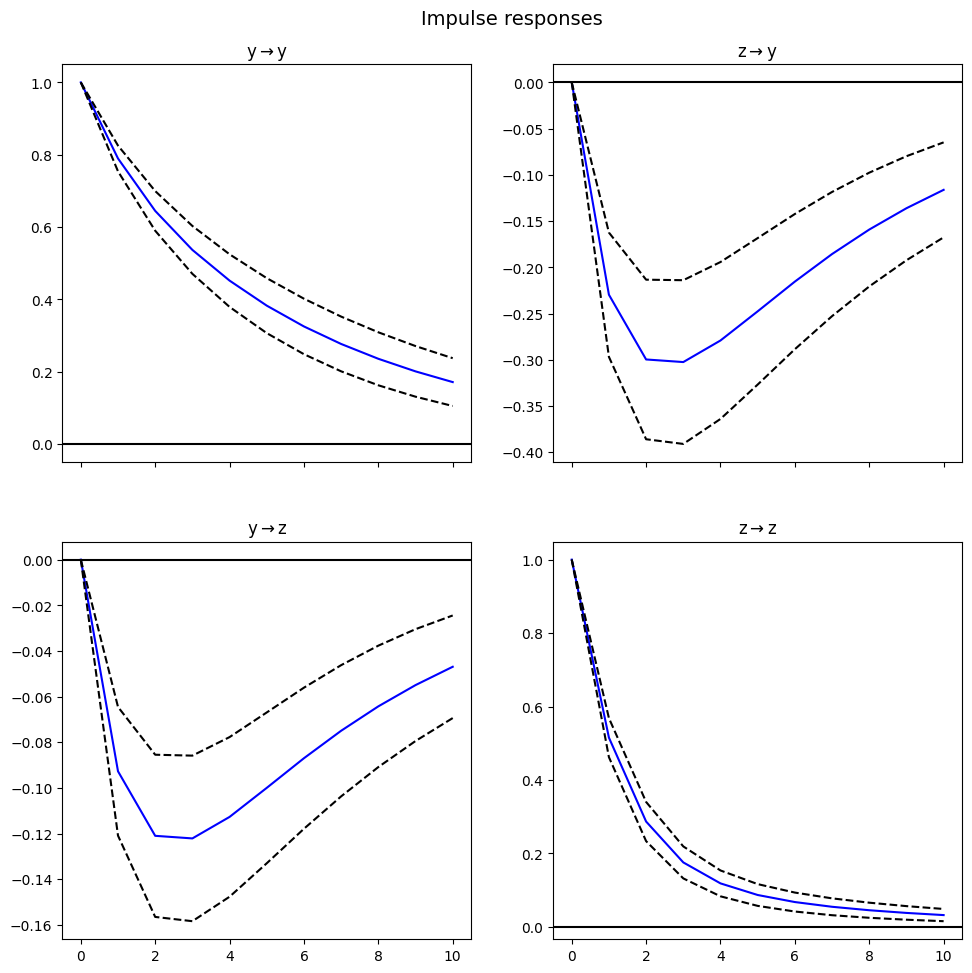

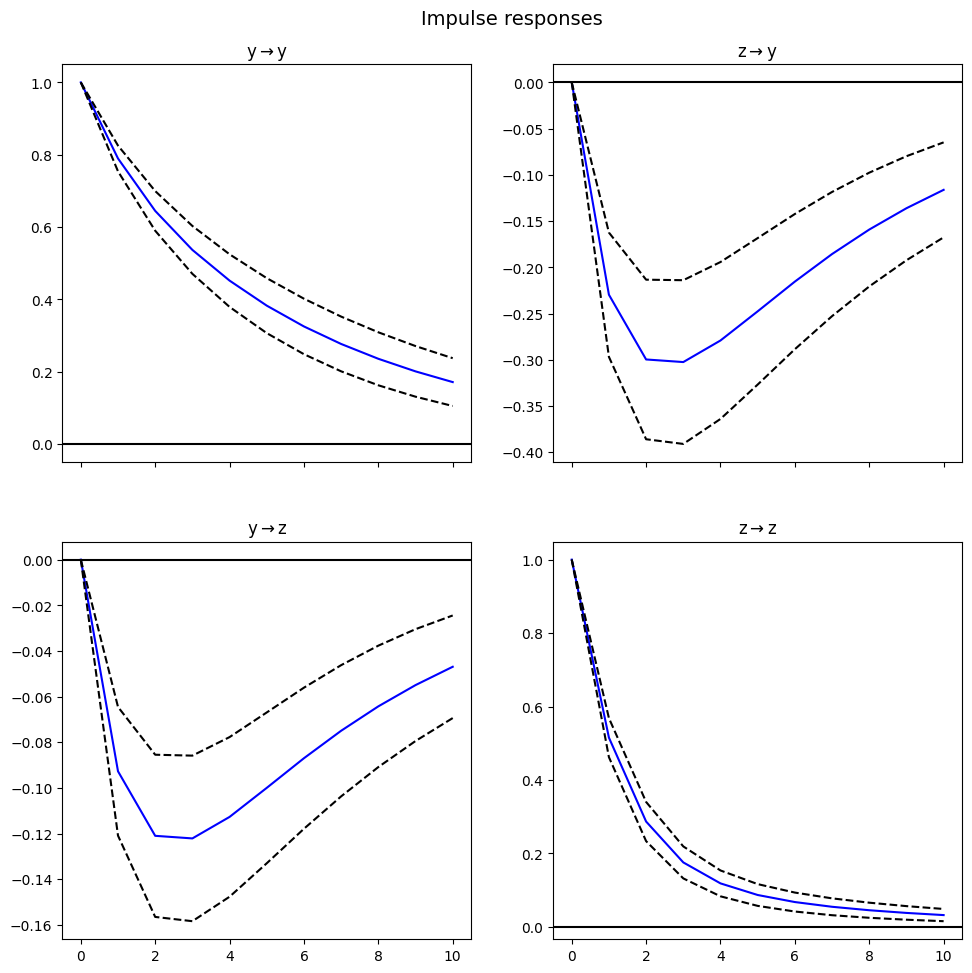

In [45]:
# We can perform an impulse response analysis by calling the irf function on a VARResults object:

type(results)

irf = results.irf(10) #10 period effect
irf.plot(orth=False)